<a href="https://colab.research.google.com/github/AbhishekIH2005/python/blob/main/Property_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Property Price  pridection

# 1 Problem Statement

roperty prices are influenced by multiple factors such as house size, location, age, and overall condition. Accurately estimating property prices is important for buyers, sellers, real estate companies, and financial institutions. Manual estimation often leads to incorrect pricing and poor decision-making.

The objective of this project is to build a regression-based machine learning model to predict property prices using historical housing data and to identify the most important factors influencing house prices.

# 2 Objectives of the Project
->Understand property price patterns

->Perform basic data preprocessing

->Conduct minimal but meaningful Exploratory Data Analysis (EDA)

->Build regression-based machine learning models

->Evaluate model performance using regression metrics

->Identify key price-influencing features

#Dataset Discription

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv("train.csv")
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

#4 Explotary DataAnalysis Minimal Graph

##Graph 1 price discription

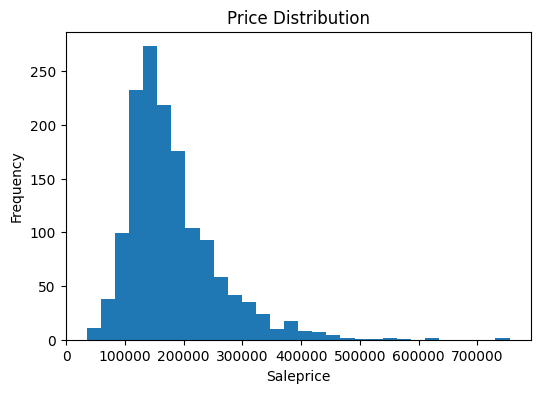

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df['SalePrice'],bins=30)
plt.xlabel("Saleprice")
plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.show()

Graph 2

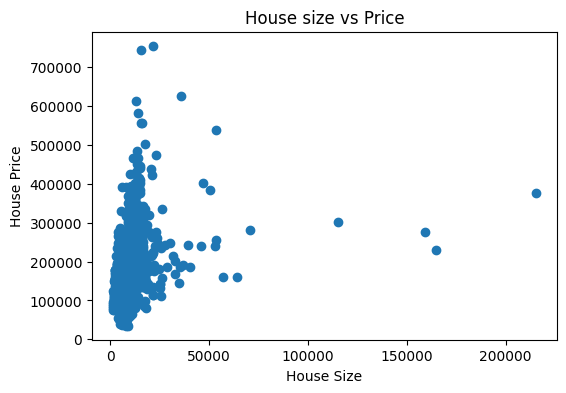

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df["LotArea"],df["SalePrice"])
plt.xlabel("House Size")
plt.ylabel("House Price")
plt.title("House size vs Price")
plt.show()

Graph 3

<Figure size 1200x600 with 0 Axes>

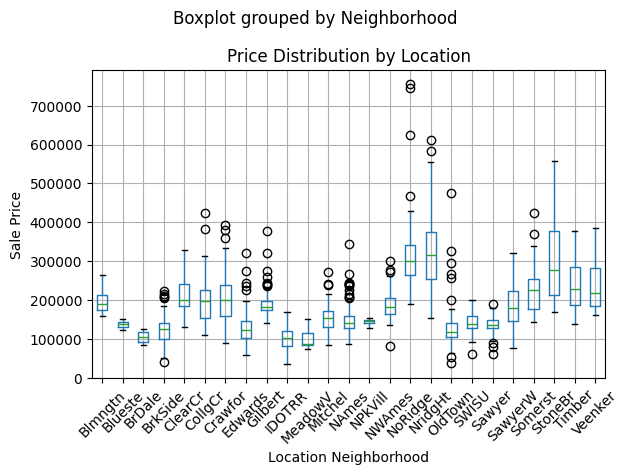

In [ ]:
plt.figure(figsize=(12,6))
df.boxplot(column="SalePrice",by="Neighborhood",rot=45)
plt.xlabel("Location Neighborhood")
plt.ylabel("Sale Price")
plt.title("Price Distribution by Location")
plt.tight_layout()
plt.show()

Graph 3

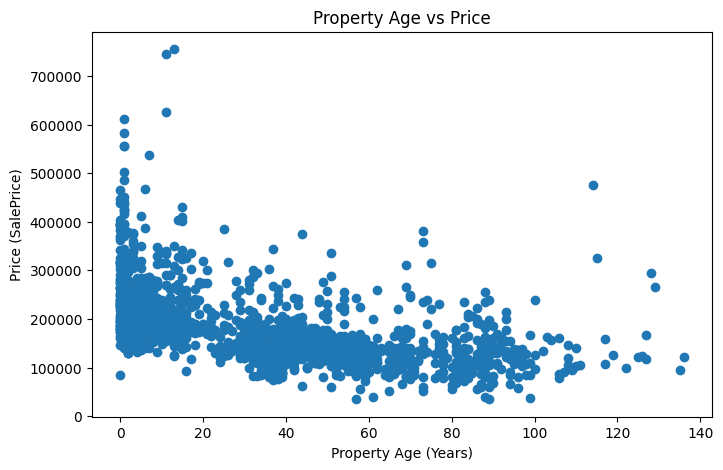

In [ ]:
# Create Property Age feature
df['PropertyAge'] = df['YrSold'] - df['YearBuilt']
plt.figure(figsize=(8, 5))
plt.scatter(df['PropertyAge'], df['SalePrice'])
plt.xlabel('Property Age (Years)')
plt.ylabel('Price (SalePrice)')
plt.title('Property Age vs Price')
plt.show()

#5 Machine Learning Work

In [ ]:
#Categorical Missing Value
cat_cols = df.select_dtypes(include="object").columns
df[cat_cols] =df[cat_cols].fillna(df[cat_cols].mode().iloc[0])
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave  Grvl      Reg   
1        2          20       RL         80.0     9600   Pave  Grvl      Reg   
2        3          60       RL         68.0    11250   Pave  Grvl      IR1   
3        4          70       RL         60.0     9550   Pave  Grvl      IR1   
4        5          60       RL         84.0    14260   Pave  Grvl      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave  Grvl      Reg   
1456  1457          20       RL         85.0    13175   Pave  Grvl      Reg   
1457  1458          70       RL         66.0     9042   Pave  Grvl      Reg   
1458  1459          20       RL         68.0     9717   Pave  Grvl      Reg   
1459  1460          20       RL         75.0     9937   Pave  Grvl      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscF

In [ ]:
#Numeric Missing Value
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave  Grvl      Reg   
1        2          20       RL         80.0     9600   Pave  Grvl      Reg   
2        3          60       RL         68.0    11250   Pave  Grvl      IR1   
3        4          70       RL         60.0     9550   Pave  Grvl      IR1   
4        5          60       RL         84.0    14260   Pave  Grvl      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave  Grvl      Reg   
1456  1457          20       RL         85.0    13175   Pave  Grvl      Reg   
1457  1458          70       RL         66.0     9042   Pave  Grvl      Reg   
1458  1459          20       RL         68.0     9717   Pave  Grvl      Reg   
1459  1460          20       RL         75.0     9937   Pave  Grvl      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscF

In [ ]:
#Encoded categorical Variables
df = pd.get_dummies(df,drop_first=True)
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,False,True,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,False,True,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,False,True,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
#Define features and target
X = df.drop("SalePrice",axis=1)
y = df["SalePrice"]

In [ ]:
#Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Train and Test Split
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size = 0.2,random_state=42
)

6 Model Used

#Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

#Decision Tree

In [ ]:
dt_regressor = DecisionTreeRegressor(max_depth=5,random_state=42)
dt_regressor.fit(X_train,y_train)
y_pred = dt_regressor.predict(X_test)
print(y_pred)

[147492.23636364 434478.33333333 147492.23636364 187204.06338028
 344700.         118782.31050228 194581.41258741 187204.06338028
 118782.31050228 129704.11864407 159900.07407407 118782.31050228
 118782.31050228 230508.38235294 187204.06338028 147492.23636364
 194581.41258741 147492.23636364 147492.23636364 194581.41258741
 129704.11864407 253354.34615385 187204.06338028 118782.31050228
 194581.41258741 147492.23636364 194581.41258741 118782.31050228
 187204.06338028 194581.41258741 118782.31050228 240343.42105263
 129704.11864407 118782.31050228 253354.34615385 147492.23636364
 129704.11864407 194581.41258741 289155.67857143 118782.31050228
 118782.31050228 240343.42105263 118782.31050228 337087.42857143
 147492.23636364 149404.28571429 118782.31050228 118782.31050228
 425014.47058824 164977.88461538 118782.31050228 187204.06338028
 118782.31050228 434478.33333333 118782.31050228 230508.38235294
 194581.41258741 147492.23636364 147492.23636364 118782.31050228
  87358.41666667 147492.2

#EValuation Function

In [ ]:
from sklearn.metrics import r2_score
def evaluate(y_true,y_pred,name):
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    r2=r2_score(y_true,y_pred)
    print(f"\n{name}")
    print("RMSE:",round(rmse,2))
    print("R2 Score:",round(r2,3))

evaluate(y_test,lr_pred,"Linear Regression")
evaluate(y_test,y_pred,"DecisionTree")


Linear Regression
RMSE: 51405.09
R2 Score: 0.655

DecisionTree
RMSE: 38653.58
R2 Score: 0.805


#7 Model Evalution

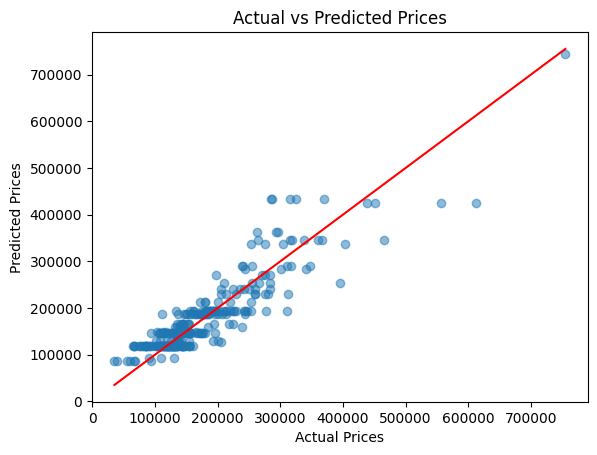

In [ ]:
min_val = min(y_test.min(),y_pred.min())
max_val = max(y_test.max(),y_pred.max())
plt.scatter(y_test, y_pred, alpha=0.5) # Scatter plot for actual vs. predicted
plt.plot([min_val,max_val],[min_val,max_val], color='red') # Diagonal line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

#Train Random Forest

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Metrics

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", round(rmse, 2))
print("R2 Score:", round(r2, 3))

RMSE: 29004.61
R2 Score: 0.89


#8 Identifying Price -influencing Factor

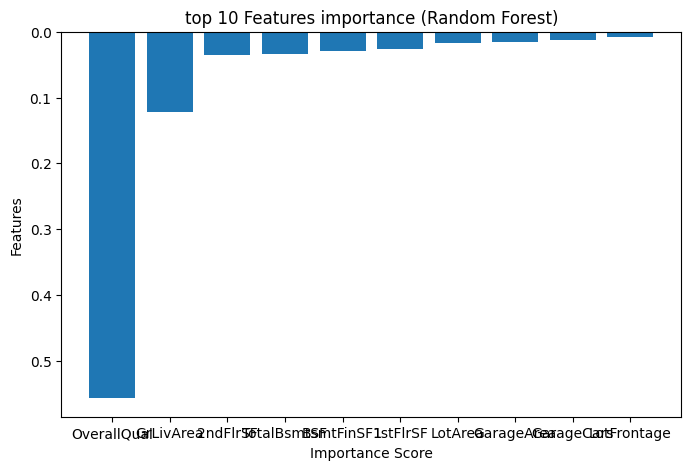

In [ ]:
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
top10 = importance_df.nlargest(10, 'Importance')

plt.figure(figsize=(8,5))
plt.bar(top10["Feature"],top10["Importance"])
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("top 10 Features importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()